<a href="https://colab.research.google.com/github/ychoi-kr/LLM-API/blob/main/upstage/web_image_ocr_qa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 웹에서 이미지를 크롤링하고 텍스트를 추출해 질의응답

## 이미지 가져오기

Content-Type: image/jpeg


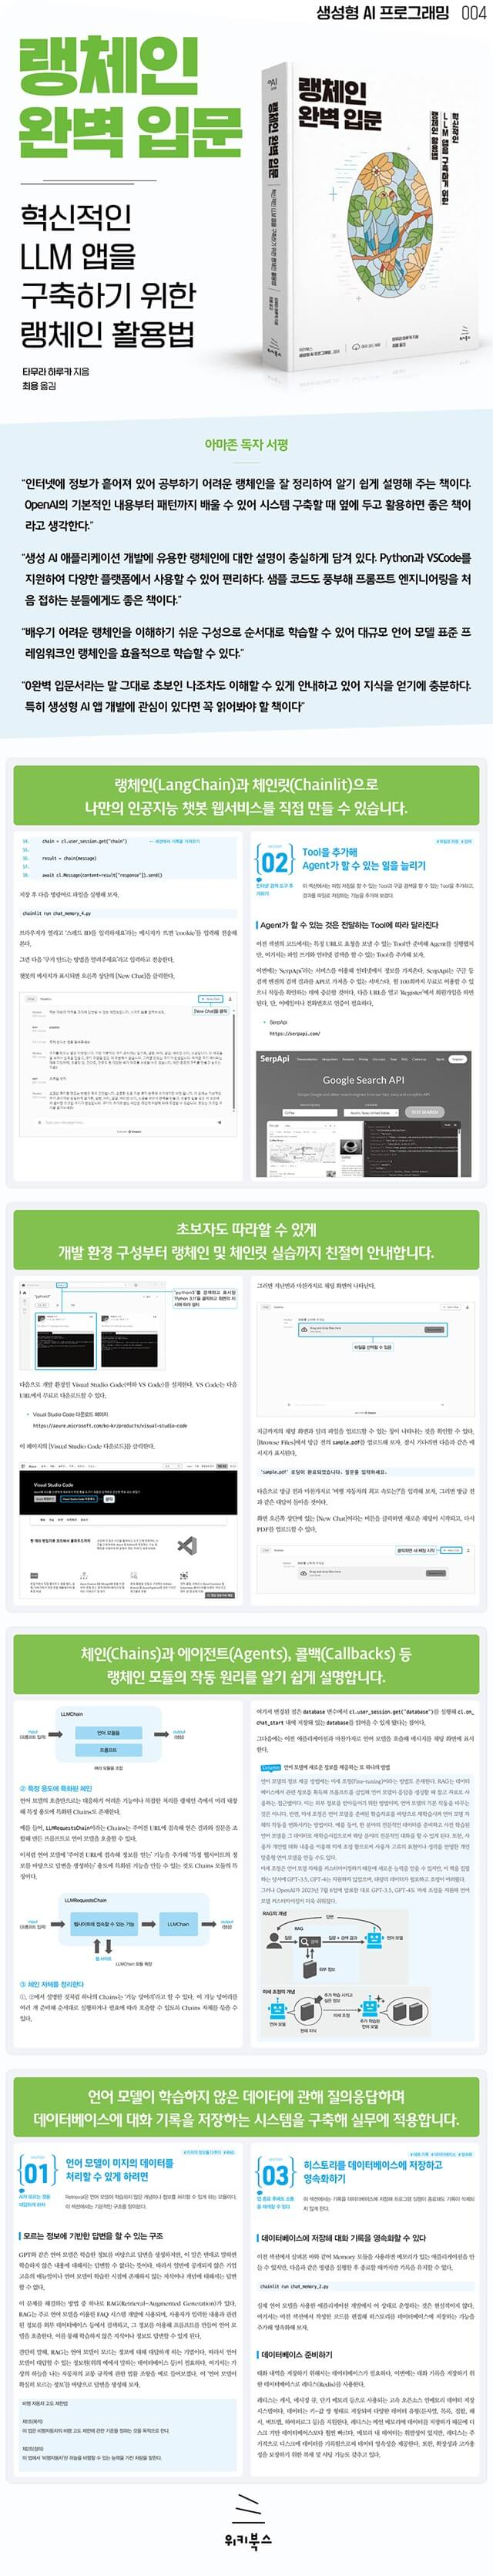

Image saved successfully in /content/langchain_Detail.jpg


In [1]:
import requests
from urllib.parse import urlparse, unquote
from PIL import Image
from io import BytesIO

# 이미지 URL 설정
image_url = "https://ychoi.kr/assets/images/books/langchain_Detail.jpg"

# 이미지 다운로드
response = requests.get(image_url)
content_type = response.headers.get('Content-Type')
print(f"Content-Type: {content_type}")

image_path = None

# 이미지 데이터 확인 및 저장
if 'image' in content_type:

    parsed_url = urlparse(image_url)
    filename = unquote(parsed_url.path.split('/')[-1])

    # 이미지 데이터를 BytesIO 객체로 변환
    image_data = BytesIO(response.content)

    # PIL을 사용하여 이미지 객체 생성
    image = Image.open(image_data)

    display(image)

    # 로컬 파일 시스템에 이미지 저장
    image_path = f'/content/{filename}'
    image.save(image_path)

    print(f"Image saved successfully in {image_path}")
else:
    print("The URL does not point to an image. Please check the URL.")


## 이미지에서 텍스트 추출

In [2]:
from google.colab import userdata
api_key = userdata.get('UPSTAGE_API_KEY')

In [3]:
image_file = open(image_path, "rb")
url = "https://api.upstage.ai/v1/document-ai/ocr"
headers = {"Authorization": f"Bearer {api_key}"}
files = {"document": image_file}
response = requests.post(url, headers=headers, files=files)

print(response.json())

{'apiVersion': '1.1', 'confidence': 0.920597828585097, 'metadata': {'pages': [{'height': 3342, 'page': 1, 'width': 640}]}, 'mimeType': 'multipart/form-data', 'modelVersion': 'ocr-2.1.1', 'numBilledPages': 1, 'pages': [{'confidence': 0.920597828585097, 'height': 3342, 'id': 0, 'text': '생성형 AI 프로그래밍 004 \n랭체인 에게 랭체인 \n랭체인 완벽 입문 랭제인 LLM 혁신적인 \n완벽 입문 완벽 활용법 앱을 \n입문 구축하기 \n혁신적인 혁신적인LLM앱을 위한 \nLLM 앱을 구축하기위한정재인활용법 \n구축하기 위한 \n랭체인 활용법 QBEE 생활 \nHUNATEING \n타무라 하루카지음 \n최용 옮김 \n아마존 독자 서평 \n"인터넷에 정보가 흩어져 있어 공부하기 어려운 랭체인을 잘 정리하여 알기 쉽게 설명해 주는 책이다. \nOpenAI의 기본적인 내용부터 패턴까지 배울 수 있어 시스템 구축할 때 옆에 두고 활용하면 좋은 책이 \n라고 생각한다." \n"생성 AI 애플리케이션 개발에 유용한 랭체인에 대한 설명이 충실하게 담겨 있다. Python과 VSCode를 \n지원하여 다양한 플랫폼에서 사용할 수 있어 편리하다. 샘플 코드도 풍부해 프롬프트 엔지니어링을 처 \n음 접하는 분들에게도 좋은 책이다." \n"배우기 어려운 랭체인을 이해하기 쉬운 구성으로 순서대로 학습할 수 있어 대규모 언어 모델 표준 프 \n레임워크인 랭체인을 효율적으로 학습할 수 있다." \n"0완벽 입문서라는 말 그대로 초보인 나조차도 이해할 수 있게 안내하고 있어 지식을 얻기에 충분하다. \n특히 생성형 AI 앱 개발에 관심이 있다면 꼭 읽어봐야 할 책이다" \n랭체인(LangChain)과 체인릿(Chainlit)으로 \n나만의 인공지능 챗봇 웹서비스를 직접

In [4]:
recognized_text = response.json()["pages"][0]["text"]
print(recognized_text)

생성형 AI 프로그래밍 004 
랭체인 에게 랭체인 
랭체인 완벽 입문 랭제인 LLM 혁신적인 
완벽 입문 완벽 활용법 앱을 
입문 구축하기 
혁신적인 혁신적인LLM앱을 위한 
LLM 앱을 구축하기위한정재인활용법 
구축하기 위한 
랭체인 활용법 QBEE 생활 
HUNATEING 
타무라 하루카지음 
최용 옮김 
아마존 독자 서평 
"인터넷에 정보가 흩어져 있어 공부하기 어려운 랭체인을 잘 정리하여 알기 쉽게 설명해 주는 책이다. 
OpenAI의 기본적인 내용부터 패턴까지 배울 수 있어 시스템 구축할 때 옆에 두고 활용하면 좋은 책이 
라고 생각한다." 
"생성 AI 애플리케이션 개발에 유용한 랭체인에 대한 설명이 충실하게 담겨 있다. Python과 VSCode를 
지원하여 다양한 플랫폼에서 사용할 수 있어 편리하다. 샘플 코드도 풍부해 프롬프트 엔지니어링을 처 
음 접하는 분들에게도 좋은 책이다." 
"배우기 어려운 랭체인을 이해하기 쉬운 구성으로 순서대로 학습할 수 있어 대규모 언어 모델 표준 프 
레임워크인 랭체인을 효율적으로 학습할 수 있다." 
"0완벽 입문서라는 말 그대로 초보인 나조차도 이해할 수 있게 안내하고 있어 지식을 얻기에 충분하다. 
특히 생성형 AI 앱 개발에 관심이 있다면 꼭 읽어봐야 할 책이다" 
랭체인(LangChain)과 체인릿(Chainlit)으로 
나만의 인공지능 챗봇 웹서비스를 직접 만들 수 있습니다. 
W chain cl.user_session.get("chain") ↔세븐에서 기록을 거쳐오기 #파일드치킨 +김제 
55. 02 Agent가 할 수 있는 일을 늘리기 
Tool을 추가해 
눈 
result chain(message) 
12, 
18 mait cl.Messac ~result["response" 1).send() 
인터넷강북도구추 이석선에서는 파일 저장을 할 수 있는 Tool과 구글 검색을 할수 있는 Tool을 추가하고, 
저장 후 다음 명령어로 파일을 실행해 보자, 결과를 파일로 저장하는 기능을 추가해 보겹다. 


## 질의응답

In [5]:
!pip install openai

In [6]:
from openai import OpenAI

In [61]:
# Solar
# client = OpenAI(
#     api_key=userdata.get('UPSTAGE_API_KEY'),
#     base_url="https://api.upstage.ai/v1/solar"
# )
# model = "solar-1-mini-chat"

In [7]:
# OpenAI

client = OpenAI(api_key=userdata.get('OPENAI_API_KEY'))
model = "gpt-3.5-turbo"

In [8]:
chat_response = client.chat.completions.create(
    model=model,
    messages=[
        {"role": "system", "content": "다음은 이미지 OCR 결과입니다.\n\n" + recognized_text},
        {"role": "user", "content": "아마존 독자 서평이 뭐라고 되어 있나요?"}
    ]
)

In [9]:
print(chat_response.choices[0].message.content)

아마존 독자 서평에는 다음과 같이 되어 있습니다:

"인터넷에 정보가 흩어져 있어 공부하기 어려운 랭체인을 잘 정리하여 알기 쉽게 설명해 주는 책이다. OpenAI의 기본적인 내용부터 패턴까지 배울 수 있어 시스템 구축할 때 옆에 두고 활용하면 좋은 책이라고 생각한다."

"생성 AI 애플리케이션 개발에 유용한 랭체인에 대한 설명이 충실하게 담겨 있다. Python과 VSCode를 지원하여 다양한 플랫폼에서 사용할 수 있어 편리하다. 샘플 코드도 풍부해 프롬프트 엔지니어링을 처음 접하는 분들에게도 좋은 책이다."

"배우기 어려운 랭체인을 이해하기 쉬운 구성으로 순서대로 학습할 수 있어 대규모 언어 모델 표준 프레임워크인 랭체인을 효율적으로 학습할 수 있다."

"완벽 입문서라는 말 그대로 초보인 나조차도 이해할 수 있게 안내하고 있어 지식을 얻기에 충분하다. 특히 생성형 AI 앱 개발에 관심이 있다면 꼭 읽어봐야 할 책이다."
